# <center>Créez un outil de visualisation pour un réseau neuronal convolutif</center>

## Contexte du projet

Une startup edtech offre des services de vulgarisation de l'IA.  
Notre équipe (Mélody, Matthis & Toska) sont chargé de répondre au souhait du client :  
**Avoir un outil de démo pour expliquer comment fonctionne un réseau de neurones.**  

​

Notre premier objectif est de créer un modèle de **Deep Learning** pour **classifier des lettres**. Nous devons développer l'interface utilisateur (avec **Streamlit**) qui permet de dessiner une lettre (ou choisir aléatoirement une lettre d'un dataset d'images) et de **détecter** s'il correspond à **une lettre entre A & Z**.  

​

source image : https://www.mdpi.com/2076-3417/9/15/3169  

​

Pour l'interface utilisateur, notre **première version streamlit** doit être capable de **montrer une image aléatoire du dataset test**. Ensuite, grâce à un bouton "predict", notre modèle peut prédire le bon nombre et afficher le résultat dans l'interface. À la fin, l'interface doit nous permettre avec un bouton de valider si le modèle a correctement classé l'image ou non.  

​

Dans un deuxième temps, nous essayerons de faire évoluer notre interface comme un jeu.  
Dans cette deuxième version, l'interface doit nous permettre de dessiner un nombre et le transformer en image. Cette image va ensuite être utilisée par le modèle pour prédire le bon nombre et afficher le résultat. L'idée derrière est de donner 10 opportunités à votre modèle de détecter le chiffre dessiné et donner des stats à la fin par rapport à sa performance de prédiction.  

​

Inspiration d'interface pour faire évoluer notre démo : https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html  

## Librairies

In [1]:
import numpy as np
import pandas as pd
from math import *

#viz
import seaborn as sns
import matplotlib.pyplot as plt


#modeling
import keras 
import tensorflow as tf

### Importation des données

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Nous avons donc nos deux datasets. Le test ne servira qu'à la fin.  
Nous allons nous concentrer sur le train.    

Nous allons afficher notre train.  

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Il s'agit d'un tableau rempli de données correspondant aux pixels des images.  
Notre target est **label**.  

In [4]:
y = train["label"]
X = train.drop(labels = ["label"],axis = 1)

Après avoir séparé la target du reste du df, nous pouvons procéder à son étude.  

In [5]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

La target est assez équilibrée.  
Nous pouvons mieux nous en rendre compte avec un graphique :  

<AxesSubplot:xlabel='label', ylabel='count'>

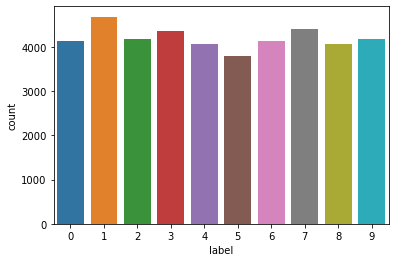

In [6]:
sns.countplot(x= y)

In [7]:
X.shape #taille du df

(42000, 784)

In [8]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

Pas de données manquantes dans le train et le test.  

In [11]:
print(sqrt(784)) #dimension de l'image

28.0


Nous avons besoin de transformer nos données en matrice.  

In [13]:
X = X.to_numpy()

In [14]:
X[0] #ligne de notre array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Nous standardisons les données pour que notre réseau de neurones comprenne mieux ce qu'il voit.  

In [15]:
X = X / 255.0 #on passe nos données de 0 à 1

In [16]:
print(np.unique(X, return_counts=True))

(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.2901

In [17]:
X.shape #ici nous avons une ligne de 784 pixels

(42000, 784)

In [18]:
X = X.reshape(X.shape[0], 28, 28) # nous transformons notre X en matrice pour que ça devienne une image de 28 par 28

In [19]:
X.shape

(42000, 28, 28)

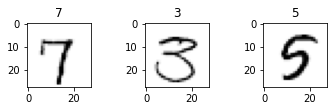

In [22]:
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(X[i], cmap='Greys')
    plt.title(y[i]);

In [23]:
y.shape

(42000,)

In [24]:
y = y.to_numpy() # Pareil, nous transformons notre target en numpy pour la lecture par le réseau de neurone

In [25]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
      dtype=int64))


In [26]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)